In [1]:
from fastai.vision.all import *
from utils import *

from fastai.imports import *
from fastai.vision.widgets import *
# to easier work with paths
from pathlib import Path
matplotlib.rc('image', cmap='Greys')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os



In [3]:
path = Path()
path.ls()

(#6) [Path('.ipynb_checkpoints'),Path('models'),Path('digitRecognizer.html'),Path('digitRecognizer.ipynb'),Path('test.csv'),Path('train.csv')]

In [4]:
train = pd.read_csv(path/'train.csv')
test = pd.read_csv(path/'test.csv')

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


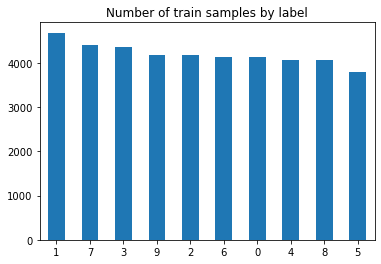

In [6]:
train.label.value_counts().plot.bar(rot=0,title='Number of train samples by label');

In [7]:
print(train.shape, test.shape)

(42000, 785) (28000, 784)


In [8]:
# train[1:3]


In [9]:
# train[train.columns[1:]]

In [10]:
train[train.columns[1:]].sample(1).values.shape


(1, 784)

In [11]:
train[train.columns[1:]].sample(1).values.ravel().shape


(784,)

<AxesSubplot:>

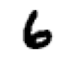

In [12]:
sample = train[train.columns[1:]].sample(1)
imExample = sample.sample(1).values.ravel().reshape(28,28)
show_image(imExample)

In [13]:
sample

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
37200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train['label'][9842:9850]

9842    2
9843    3
9844    3
9845    3
9846    3
9847    8
9848    9
9849    1
Name: label, dtype: int64

In [15]:
valid = train.sample(frac=0.2, random_state=1337)
valid.shape

(8400, 785)

In [16]:
# remove validation data from train dataset
train = train.drop(valid.index)
train.shape

(33600, 785)

In [17]:
# separate labels from data
Y_train = train["label"]
Y_valid = valid["label"]
X_train = train.drop("label", axis=1)
X_valid = valid.drop("label", axis=1)

In [18]:
print(X_train.shape, X_valid.shape)
print(Y_train.shape, Y_valid.shape)

(33600, 784) (8400, 784)
(33600,) (8400,)


In [19]:
# trying ways

In [20]:
train.iloc[0:2,1:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dblock = DataBlock()

In [22]:
dsets = dblock.datasets(train)

In [23]:
len(dsets.train),len(dsets.valid)

(26880, 6720)

In [24]:
x,y = dsets.train[0]
x,y

(label       1
 pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Name: 10313, Length: 785, dtype: int64,
 label       1
 pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Name: 10313, Length: 785, dtype: int64)

In [25]:
def get_x(r): return r.iloc[1:]
def get_y(r): return r['label']

dblock = DataBlock(get_x = get_x, get_y = get_y,splitter=RandomSplitter(seed=42))
dsets = dblock.datasets(train)
dsets.train[0]

(pixel0      0
 pixel1      0
 pixel2      0
 pixel3      0
 pixel4      0
            ..
 pixel779    0
 pixel780    0
 pixel781    0
 pixel782    0
 pixel783    0
 Name: 37147, Length: 784, dtype: int64,
 1)

In [26]:
dls = dblock.dataloaders(train)

Could not do one pass in your dataloader, there is something wrong in it


In [27]:
# trying an other way of using the data

In [28]:
TRAIN = Path("../../storage/train")
TEST = Path("../../storage/test")

In [29]:
# Create training directory
for index in range(10):
    try:
        os.makedirs(TRAIN/str(index))
    except:
        pass

In [30]:
try:
    os.makedirs(TEST)
except:
    pass

In [31]:

# import PIL to display images and to create images from arrays
from PIL import Image

def saveDigit(digit, filepath):
    digit = digit.reshape(28,28)
    digit = digit.astype(np.uint8)

    img = Image.fromarray(digit)
    img.save(filepath)

In [32]:
# save training images
for index, row in train.iterrows():
    
    label,digit = row[0], row[1:]
    
    folder = TRAIN/str(label)
    filename = f"{index}.jpg"
    filepath = folder/filename
    
    digit = digit.values
    
    saveDigit(digit, filepath)

In [33]:

for index, row in train.iterrows():
    if index < 2:
        print(index, row)

0 label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64
1 label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 1, Length: 785, dtype: int64


In [34]:
test = pd.read_csv(path/'test.csv')

In [36]:
# save testing images
for index, digit in test.iterrows():

    folder = TEST
    filename = f"{index}.jpg"
    filepath = folder/filename
    
    digit = digit.values
    
    saveDigit(digit, filepath)

In [37]:
fns = get_image_files(TRAIN)

In [38]:
fns

(#33600) [Path('../../storage/train/6/2936.jpg'),Path('../../storage/train/6/39450.jpg'),Path('../../storage/train/6/30603.jpg'),Path('../../storage/train/6/3463.jpg'),Path('../../storage/train/6/2269.jpg'),Path('../../storage/train/6/13372.jpg'),Path('../../storage/train/6/25279.jpg'),Path('../../storage/train/6/25608.jpg'),Path('../../storage/train/6/31853.jpg'),Path('../../storage/train/6/4593.jpg')...]

In [39]:
# failed = verify_images(fns)

In [40]:
# failed

In [41]:
im = Image.open('../../storage/train/0/63.jpg')
im


In [42]:
numbers = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [43]:
dls = numbers.dataloaders(TRAIN)

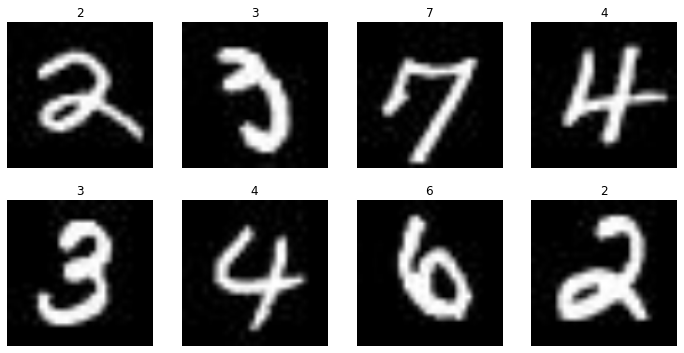

In [44]:
dls.valid.show_batch(max_n=8, nrows=2)

In [45]:
numbers = numbers.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = numbers.dataloaders(TRAIN)
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.742779,0.263490,0.089732,00:32


epoch,train_loss,valid_loss,error_rate,time
0,0.233070,0.052659,0.017560,00:40
1,0.119769,0.041114,0.011905,00:41
2,0.097061,0.032749,0.009821,00:40


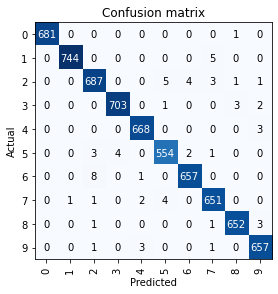

In [46]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [47]:
interp.most_confused(min_val=2)

[('6', '2', 8),
 ('1', '7', 5),
 ('2', '5', 5),
 ('2', '6', 4),
 ('5', '3', 4),
 ('7', '5', 4),
 ('2', '7', 3),
 ('3', '8', 3),
 ('4', '9', 3),
 ('5', '2', 3),
 ('8', '9', 3),
 ('9', '4', 3),
 ('3', '9', 2),
 ('5', '6', 2),
 ('7', '4', 2)]

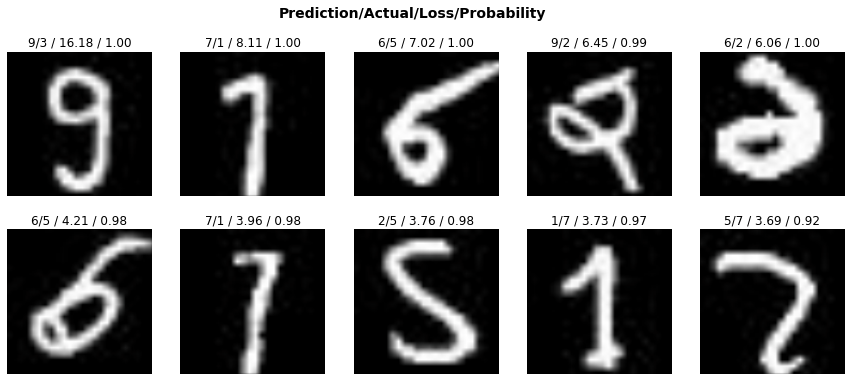

In [48]:
interp.plot_top_losses(10, nrows=2)

In [49]:
# from fastai.vision.widgets import *
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [50]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,0.102576,0.037053,0.012202,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.088391,0.035157,0.009970,00:41
1,0.105560,0.043325,0.013244,00:41
2,0.097214,0.038614,0.011756,00:41
3,0.098581,0.040516,0.013839,00:41
4,0.075841,0.032762,0.009970,00:41
5,0.067425,0.020168,0.005655,00:41
6,0.057324,0.024213,0.007143,00:41
7,0.049191,0.021032,0.006696,00:41
8,0.036773,0.016329,0.004911,00:41
9,0.038664,0.017275,0.005357,00:41


In [51]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.737722,0.247801,0.084970,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.172348,0.048587,0.016071,01:01
1,0.102715,0.030021,0.008482,01:01


In [52]:
learn.fine_tune(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.098757,0.030104,0.008185,00:49


epoch,train_loss,valid_loss,error_rate,time
0,0.088802,0.029551,0.007589,01:01
1,0.117971,0.031173,0.007738,01:01
2,0.106549,0.039283,0.012351,01:01
3,0.095098,0.035369,0.010417,01:01
4,0.078189,0.020162,0.005506,01:01
5,0.051694,0.018576,0.004911,01:01
6,0.033533,0.016078,0.004315,01:01
7,0.049594,0.015076,0.003869,01:01


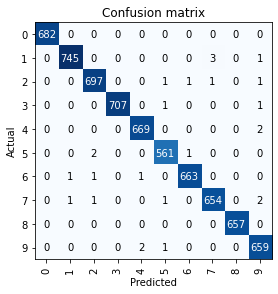

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


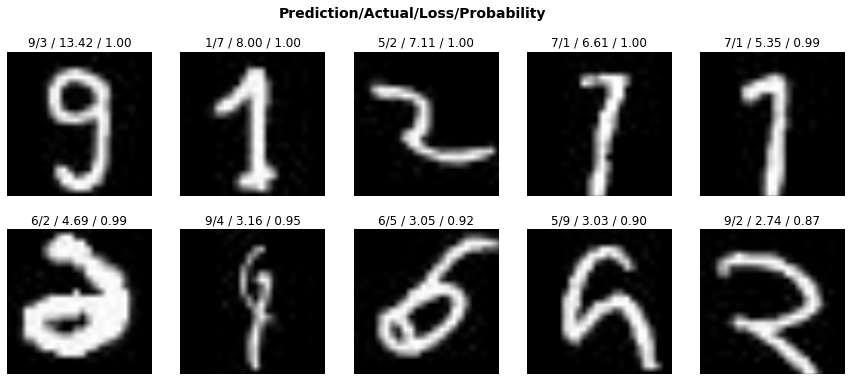

In [54]:
interp.plot_top_losses(10, nrows=2)

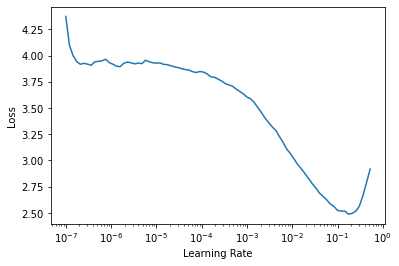

In [55]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [56]:
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

Minimum/10: 1.74e-02, steepest point: 6.31e-03


In [57]:
lr_min * 10000000

173780.08365631104

In [66]:
learn0 = cnn_learner(dls, resnet34, metrics=error_rate)
learn0.fine_tune(10, base_lr=lr_min)

epoch,train_loss,valid_loss,error_rate,time
0,0.472479,0.142514,0.043155,00:45


epoch,train_loss,valid_loss,error_rate,time
0,0.194659,0.088306,0.026339,01:02
1,0.211264,0.093554,0.026786,01:02
2,0.170866,0.078191,0.024851,01:02
3,0.151222,0.056560,0.016964,01:02
4,0.123519,0.053325,0.013542,01:02
5,0.080029,0.035416,0.010863,01:02
6,0.079374,0.019577,0.005506,01:02
7,0.053403,0.022666,0.006101,01:02
8,0.044831,0.015779,0.003869,01:01
9,0.046636,0.014624,0.003869,01:01


In [59]:
# learn1 = cnn_learner(dls, resnet34, metrics=error_rate)
# learn1.fine_tune(10, base_lr=8e-06)

In [60]:
# learn2 = cnn_learner(dls, resnet34, metrics=error_rate)
# learn2.fine_tune(10, base_lr=lr_steep)

In [61]:
# learn3 = cnn_learner(dls, resnet34, metrics=error_rate)
# learn3.fine_tune(10, base_lr=8e-08)

In [62]:
# faire le truc du one cycle

In [63]:
# et ca ensuite AVEC 50 RESNET ET EN HAUT AUSSI
# learn = cnn_learner(dls, resnet50, metrics=error_rate)
# learn.fit_one_cycle(3, 3e-3)
# learn.unfreeze()
# learn.fit_one_cycle(12, lr_max=slice(1e-6,1e-4))

In [64]:
# You may have to restart your notebook when this happens. The way to
# solve it is to use a smaller batch size, which means passing smaller groups of images
# at any given time through your model. You can pass
# the batch size you want to the call creating your DataLoaders with bs=.

In [65]:
# from fastai.callback.fp16 import *
# learn = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
# learn.fine_tune(6, freeze_epochs=3)